# 📗 Notebook 1 — Data Exploration and Preparation

In [1]:
# %% ===============================================================
# STEP 0 — ENVIRONMENT SETUP
# ===============================================================
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("viridis")

# Directory structure
BASE_DIR = Path("..")
DATA_RAW = BASE_DIR / "data" / "raw"
DATA_PROCESSED = BASE_DIR / "data" / "processed"
OUTPUTS = BASE_DIR / "outputs"
FIGURES = OUTPUTS / "figures"

for path in [DATA_RAW, DATA_PROCESSED, FIGURES]:
    path.mkdir(parents=True, exist_ok=True)

print("✅ Environment setup complete.")

✅ Environment setup complete.


In [2]:
# %% ===============================================================
# STEP 1 — LOAD AND INSPECT RAW DATA
# ===============================================================
DATA_PATH = DATA_RAW / "kaggle_esg.csv"

df = pd.read_csv(DATA_PATH)
print(f"✅ Data loaded successfully. Shape: {df.shape}")

# Quick glance
display(df.head())

# Basic information
df.info()

# Missing values
print("\n🔍 Missing values per column:")
display(df.isna().sum())

✅ Data loaded successfully. Shape: (11000, 16)


,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

CompanyID               0
CompanyName             0
Industry                0
Region                  0
Year                    0
Revenue                 0
ProfitMargin            0
MarketCap               0
GrowthRate           1000
ESG_Overall             0
ESG_Environmental       0
ESG_Social              0
ESG_Governance          0
CarbonEmissions         0
WaterUsage              0
EnergyConsumption       0
dtype: int64

In [3]:
# %% ===============================================================
# STEP 2 — INITIAL DATA CLEANING
# ===============================================================
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Remove duplicate rows if any
duplicates = df.duplicated().sum()
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"🧹 Removed {duplicates} duplicate rows.")
else:
    print("✅ No duplicates found.")

# Handle missing numeric values (simple imputation for now)
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("✅ Basic cleaning complete.")

✅ No duplicates found.
✅ Basic cleaning complete.


,count,mean,std,min,25%,50%,75%,max
CompanyID,11000.0,5.005000e+02,2.886881e+02,1.0,250.750,500.50,750.250,1.000000e+03
Year,11000.0,2.020000e+03,3.162421e+00,2015.0,2017.000,2020.00,2023.000,2.025000e+03
Revenue,11000.0,4.670851e+03,9.969954e+03,35.9,938.775,1902.30,4342.625,1.808104e+05
ProfitMargin,11000.0,1.090045e+01,8.758711e+00,-20.0,5.300,10.50,16.300,5.000000e+01
MarketCap,11000.0,1.338062e+04,3.992287e+04,1.8,1098.525,3096.45,9995.500,8.652717e+05
GrowthRate,11000.0,4.836700e+00,8.986164e+00,-36.0,-0.600,4.90,10.300,3.800000e+01
ESG_Overall,11000.0,5.461527e+01,1.589394e+01,6.3,44.100,54.60,65.600,9.880000e+01
ESG_Environmental,11000.0,5.641699e+01,2.676723e+01,0.0,34.700,55.60,79.000,1.000000e+02
ESG_Social,11000.0,5.566058e+01,2.335615e+01,0.0,37.600,55.15,73.800,1.000000e+02
ESG_Governance,11000.0,5.176765e+01,2.532337e+01,0.0,30.775,52.10,73.000,1.000000e+02


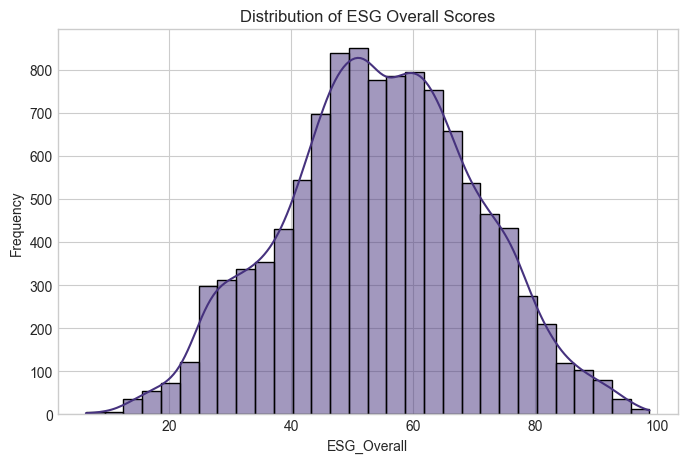

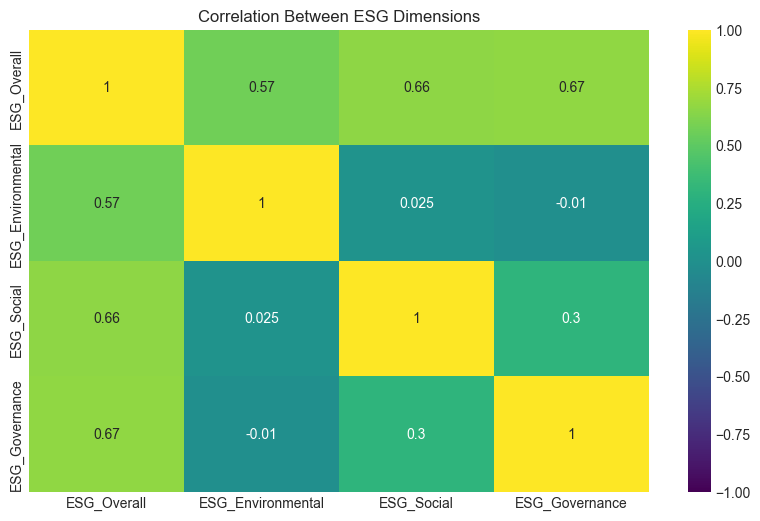

In [4]:
# %% ===============================================================
# STEP 3 — EXPLORATORY ANALYSIS (STRUCTURE)
# ===============================================================
# Descriptive statistics
display(df.describe().T)

# ESG Score distribution
plt.figure(figsize=(8,5))
sns.histplot(df["ESG_Overall"], bins=30, kde=True)
plt.title("Distribution of ESG Overall Scores")
plt.xlabel("ESG_Overall")
plt.ylabel("Frequency")
plt.show()

# ESG score correlation heatmap
plt.figure(figsize=(10,6))
esg_cols = ["ESG_Overall", "ESG_Environmental", "ESG_Social", "ESG_Governance"]
sns.heatmap(df[esg_cols].corr(), annot=True, cmap="viridis", vmin=-1, vmax=1)
plt.title("Correlation Between ESG Dimensions")
plt.show()

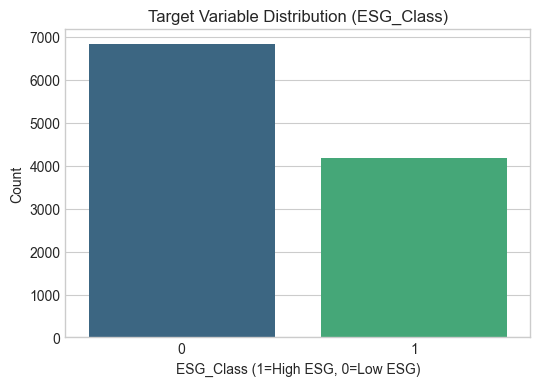

ESG_Class
0    0.621
1    0.379
Name: proportion, dtype: float64
💾 Processed data saved to 'data/processed/esg_processed.csv'

✅ Notebook 01 — Data Exploration and Preparation complete.


In [5]:
# %% ===============================================================
# STEP 4 — CREATE TARGET VARIABLE
# ===============================================================
# Define binary classification target
# Example: ESG_Overall >= 60 = 1 (Good ESG), else 0 (Poor ESG)
threshold = 60
df["ESG_Class"] = np.where(df["ESG_Overall"] >= threshold, 1, 0)

# Inspect distribution
plt.figure(figsize=(6,4))
sns.countplot(x="ESG_Class", data=df, palette="viridis")
plt.title("Target Variable Distribution (ESG_Class)")
plt.xlabel("ESG_Class (1=High ESG, 0=Low ESG)")
plt.ylabel("Count")
plt.show()

print(df["ESG_Class"].value_counts(normalize=True))

# Save processed data for modeling notebook
df.to_csv(DATA_PROCESSED / "esg_processed.csv", index=False)
print("💾 Processed data saved to 'data/processed/esg_processed.csv'")

print("\n✅ Notebook 01 — Data Exploration and Preparation complete.")